# Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import warnings
import pickle as pkl
from sklearn.preprocessing import LabelEncoder

# Preparing Data

In [9]:
#Importing dataset
dataset = pd.read_csv(r"C:\Users\BI_HAN\Desktop\final year project\fraud detection system using neural network\New folder (2)\onlinefraud.csv")
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
type_encoder = LabelEncoder()
nameOrig_encoder = LabelEncoder()
nameDest_encoder = LabelEncoder()

# Fit and transform the entire column value
dataset['type_encoded'] = type_encoder.fit_transform(dataset['type'])
dataset['nameOrig_encoded'] = nameOrig_encoder.fit_transform(dataset['nameOrig'])
dataset['nameDest_encoded'] = nameDest_encoder.fit_transform(dataset['nameDest'])

In [14]:
dataset = dataset.drop(columns=['nameDest', 'type', 'step', 'nameOrig', 'isFlaggedFraud'])

In [15]:
dataset.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,9839.64,170136.0,160296.36,0.0,0.0,0,3,757869,1662094
1,1864.28,21249.0,19384.72,0.0,0.0,0,3,2188998,1733924
2,181.00,181.0,0.00,0.0,0.0,1,4,1002156,439685
3,181.00,181.0,0.00,21182.0,0.0,1,1,5828262,391696
4,11668.14,41554.0,29885.86,0.0,0.0,0,3,3445981,828919


In [16]:
for idx, class_name in enumerate(type_encoder.classes_):
    print(f"{idx}: {class_name}")

0: CASH_IN
1: CASH_OUT
2: DEBIT
3: PAYMENT
4: TRANSFER


In [17]:
#renaming of columns for better under
dataset.rename(columns={'isFraud': 'Fraud'},  inplace=True)

In [18]:
# Splitting dataset into training and testing data
x = dataset.drop(columns=['Fraud'])
y = dataset['Fraud']

In [19]:
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_encoded,nameOrig_encoded,nameDest_encoded
0,9839.64,170136.0,160296.36,0.0,0.0,3,757869,1662094
1,1864.28,21249.0,19384.72,0.0,0.0,3,2188998,1733924
2,181.00,181.0,0.00,0.0,0.0,4,1002156,439685
3,181.00,181.0,0.00,21182.0,0.0,1,5828262,391696
4,11668.14,41554.0,29885.86,0.0,0.0,3,3445981,828919


In [20]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Fraud, dtype: int64

In [21]:
# Split the sampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
counts = dataset['Fraud'].value_counts()
counts

Fraud
0    6354407
1       8213
Name: count, dtype: int64

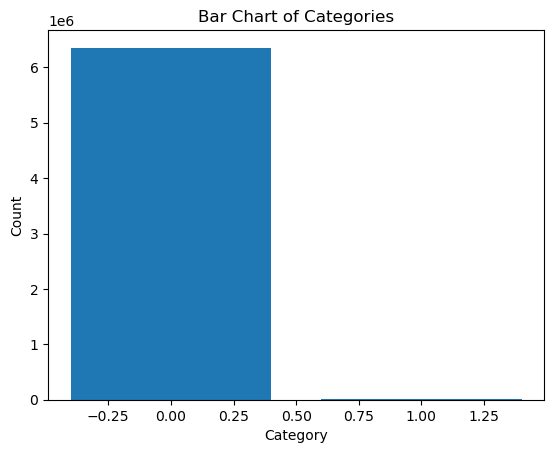

In [23]:
# Create bar chart to check imbalance 
plt.bar(counts.index, counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart of Categories')
plt.show()

Undersampling is necessary to reduce the dominance of the majority class, which can bias the model and lead to poor detection of the minority class (the fraud cases). Balancing the dataset helps the model learn both classes more effectively and improves its ability to detect rare but important events like fraud.

# Undersampling the dataset

In [24]:
# Separate majority from minority 
majority_class = dataset[dataset['Fraud'] == 0]
minority_class = dataset[dataset['Fraud'] == 1]

In [25]:
# Randomly undersample the majority class to match the minority class size
majority_class_undersampled = majority_class.sample(len(minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
dataset_balanced = pd.concat([majority_class_undersampled, minority_class])

In [26]:
# Check the new class distribution
dataset_balanced['Fraud'].value_counts()

Fraud
0    8213
1    8213
Name: count, dtype: int64

In [27]:
majority_class

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,9839.64,170136.0,160296.36,0.00,0.00,0,3,757869,1662094
1,1864.28,21249.0,19384.72,0.00,0.00,0,3,2188998,1733924
4,11668.14,41554.0,29885.86,0.00,0.00,0,3,3445981,828919
5,7817.71,53860.0,46042.29,0.00,0.00,0,3,6026525,2247218
6,7107.77,183195.0,176087.23,0.00,0.00,0,3,1805947,2063363
...,...,...,...,...,...,...,...,...,...
6362319,8634.29,518802.0,510167.71,0.00,0.00,0,3,5178671,2441065
6362320,159188.22,3859.0,0.00,0.00,159188.22,0,1,5339770,242160
6362321,186273.84,168046.0,0.00,24893.67,211167.51,0,1,69647,152673
6362322,82096.45,13492.0,0.00,0.00,82096.45,0,4,5085381,529310


In [28]:
dataset_balanced

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud,type_encoded,nameOrig_encoded,nameDest_encoded
1777056,183806.32,19391.00,0.00,382572.19,566378.51,0,1,5339622,123305
1350600,521.37,0.00,0.00,0.00,0.00,0,3,3397158,2085113
1991933,3478.18,19853.00,16374.82,0.00,0.00,0,3,2294486,2325890
5092368,1716.05,5769.17,4053.13,0.00,0.00,0,3,6069996,1003210
5066515,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0,0,3344533,396862
...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,5651847,505863
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,4,1737278,260949
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,533958,108224
6362618,850002.52,850002.52,0.00,0.00,0.00,1,4,2252932,319713


In [29]:
# Splitting sampled dataset into training and testing data
x_sampled = dataset_balanced.drop(columns=['Fraud'])
y_sampled = dataset_balanced['Fraud']

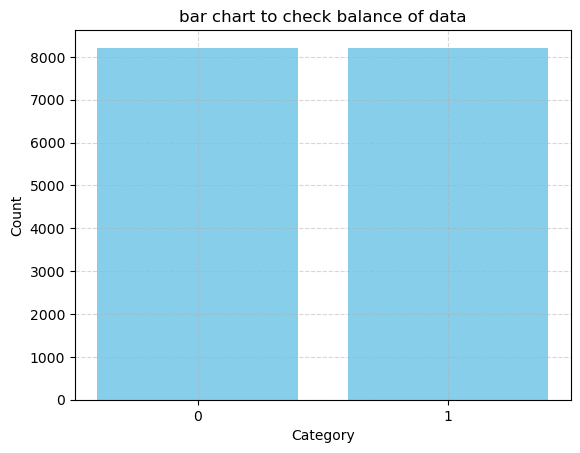

In [30]:
# bar chart to check balance of data
counts = y_sampled.value_counts()

plt.bar(counts.index.astype(str), counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('bar chart to check balance of data')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

After undersampling, the majority class has been reduced to match the size of the minority class.
This ensures that the model doesn't favor one class over the other, leading to fairer training and improved fraud detection performance, especially for the minority class(fraudulent).

In [31]:
# Split the sampled data into training and testing sets
x_sampled_train, x_sampled_test, y_sampled_train, y_sampled_test = train_test_split(x_sampled, y_sampled, test_size=0.2, random_state=42)

# Generating synthetic data for better results using smotes

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
data = dataset_balanced

# Separating the features and target
x = data.drop('Fraud', axis=1)
y = data['Fraud']

# Applying SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Checking the class distribution after resampling
print(Counter(y_resampled))

Counter({0: 8213, 1: 8213})


C:\Users\BI_HAN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [33]:
x_resampled.head(), y_resampled.head()

(      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
 0  183806.32       19391.00            0.00       382572.19       566378.51   
 1     521.37           0.00            0.00            0.00            0.00   
 2    3478.18       19853.00        16374.82            0.00            0.00   
 3    1716.05        5769.17         4053.13            0.00            0.00   
 4  253129.93     1328499.49      1581629.42      2713220.48      2460090.55   
 
    type_encoded  nameOrig_encoded  nameDest_encoded  
 0             1           5339622            123305  
 1             3           3397158           2085113  
 2             3           2294486           2325890  
 3             3           6069996           1003210  
 4             0           3344533            396862  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Fraud, dtype: int64)

In [34]:
# Combining the undersampling and oversampling
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(x_resampled, y_resampled)

# Splitting the data for retraing the model
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

C:\Users\BI_HAN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\BI_HAN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [35]:
x_train.shape

(13140, 8)

In [36]:
y_train.shape

(13140,)

# Using BiLSTM

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
# Make sure your input data is float32
import numpy as np
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)


# Building the model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile with custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping for best accuracy
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
model.fit(x_train, y_train, epochs=20, batch_size=50, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
211/211 [==============================] - 2s 5ms/step - loss: 12280.4150 - accuracy: 0.6594 - val_loss: 1477.8136 - val_accuracy: 0.7245
Epoch 2/20
211/211 [==============================] - 1s 3ms/step - loss: 3338.6487 - accuracy: 0.6936 - val_loss: 480.2872 - val_accuracy: 0.8059
Epoch 3/20
211/211 [==============================] - 1s 4ms/step - loss: 2119.6519 - accuracy: 0.7003 - val_loss: 906.9087 - val_accuracy: 0.7264
Epoch 4/20
211/211 [==============================] - 1s 3ms/step - loss: 1459.2688 - accuracy: 0.7230 - val_loss: 330.3705 - val_accuracy: 0.7584
Epoch 5/20
211/211 [==============================] - 1s 3ms/step - loss: 618.8330 - accuracy: 0.7217 - val_loss: 162.5473 - val_accuracy: 0.7652
Epoch 6/20
211/211 [==============================] - 1s 3ms/step - loss: 532.9304 - accuracy: 0.7063 - val_loss: 739.4712 - val_accuracy: 0.7302
Epoch 7/20
211/211 [==============================] - 1s 3ms/step - loss: 548.8997 - accuracy: 0.7205 - val_loss: 124.

In [40]:
accuracy = model.evaluate(x_test, y_test)

103/103 [==============================] - 1s 2ms/step - loss: 17.7073 - accuracy: 0.8223


## Creating pipeline for data

In [43]:
model.save('fraud_model.h5')

In [44]:
model = load_model('fraud_model.h5')

In [74]:
DATA = r"C:\Users\BI_HAN\Desktop\final year project\fraud detection system using neural network\New folder (2)\onlinefraud.csv"
NEW_DATA_PATH = r"C:\Users\BI_HAN\Desktop\final year project\fraud detection system using neural network\New folder (2)\new_data.csv"  # new data
MODEL_PATH = "fraud_model.h5"   # saved model

In [46]:
new_entry = pd.DataFrame({
    "amount": [183806.32],		
    "oldbalanceOrg": [19391.00],
    "newbalanceOrig": [0.00],	
    "oldbalanceDest": [382572.19],	
    "newbalanceDest":	[566378.51],	
    "Fraud": [0],
    "type_encoded": [1],
    "nameOrig_encoded": [5339622],
    "nameDest_encoded": [123305]
})

# Save to CSV
new_entry.to_csv("new_data.csv", index=False)

In [71]:
def train_model(DATA):
    # Load data
    data = pd.read_csv(DATA)
    
    # Rename 'isFraud' to 'Fraud' to match earlier processing
    data.rename(columns={'isFraud': 'Fraud'}, inplace=True)
    
    # Drop unnecessary columns (consistent with earlier preprocessing)
    data = data.drop(columns=['nameDest', 'type', 'step', 'nameOrig', 'isFlaggedFraud'], errors='ignore')
    
    # Encode categorical variables
    type_encoder = LabelEncoder()
    nameOrig_encoder = LabelEncoder()
    nameDest_encoder = LabelEncoder()
    
    data['type_encoded'] = type_encoder.fit_transform(data['type'])
    data['nameOrig_encoded'] = nameOrig_encoder.fit_transform(data['nameOrig'])
    data['nameDest_encoded'] = nameDest_encoder.fit_transform(data['nameDest'])
    
    # Drop original categorical columns
    data = data.drop(columns=['nameDest', 'type', 'nameOrig'], errors='ignore')
    
    # Split features and target
    X = data.drop(columns=['Fraud'], errors='ignore')
    y = data['Fraud']
    
    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    input_dim = X_train.shape[1]
    
    # Build model
    model = Sequential([
        Dense(64, input_shape=(input_dim,), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train model
    model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val), 
              callbacks=[early_stop], shuffle=True)
    
    # Save model
    model.save("fraud_model.h5")
    
    return model


In [81]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# File paths
DATA = r"C:\Users\BI_HAN\Desktop\final year project\fraud detection system using neural network\New folder (2)\onlinefraud.csv"
NEW_DATA_PATH = r"C:\Users\BI_HAN\Desktop\final year project\fraud detection system using neural network\New folder (2)\new_data.csv"
MODEL_PATH = "fraud_model.h5"
COUNT_FILE = "update_counter.txt"

# Define exact features used in training
feature_columns = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    'transaction_type_TRANSFER', 'transaction_type_CASH_OUT', 'transaction_type_OTHER'
]

# Load or initialize the counter
if os.path.exists(COUNT_FILE):
    with open(COUNT_FILE, "r") as f:
        counter = int(f.read().strip())
else:
    counter = 0

# If new data exists
if os.path.exists(NEW_DATA_PATH):
    # Load new data
    new_data = pd.read_csv(NEW_DATA_PATH)

    # Drop label column if present
    new_data = new_data.drop(columns=['Fraud', 'isFraud'], errors='ignore')

    # One-hot encode transaction type to match training
    if 'type' in new_data.columns:
        type_dummies = pd.get_dummies(new_data['type'], prefix='transaction_type')
        new_data = pd.concat([new_data, type_dummies], axis=1)
        new_data.drop(columns=['type'], inplace=True)

    # Ensure new_data has all required features
    for col in feature_columns:
        if col not in new_data.columns:
            new_data[col] = 0
    new_data = new_data[feature_columns]

    # Load model
    model = load_model(MODEL_PATH)

    # Fit scaler on original data to ensure consistency
    original_data = pd.read_csv(DATA)
    original_data.rename(columns={'isFraud': 'Fraud'}, inplace=True)
    original_data = original_data.drop(columns=['nameDest', 'nameOrig', 'step', 'isFlaggedFraud', 'Fraud'], errors='ignore')

    if 'type' in original_data.columns:
        type_dummies_orig = pd.get_dummies(original_data['type'], prefix='transaction_type')
        original_data = pd.concat([original_data, type_dummies_orig], axis=1)
        original_data.drop(columns=['type'], inplace=True)

    for col in feature_columns:
        if col not in original_data.columns:
            original_data[col] = 0
    original_data = original_data[feature_columns]

    scaler = StandardScaler()
    scaler.fit(original_data)
    X_new = scaler.transform(new_data)

    # Make predictions
    predictions = model.predict(X_new)
    new_data["prediction"] = (predictions > 0.5).astype(int)

    # Append predictions to main dataset
    if os.path.exists(DATA):
        full_data = pd.read_csv(DATA)
    else:
        full_data = pd.DataFrame()

    # Align columns with existing data (optional, ensures compatibility)
    new_data.to_csv("predicted_new_data.csv", index=False)  # Save with prediction
    updated_data = pd.concat([full_data, new_data], ignore_index=True)
    updated_data.to_csv(DATA, index=False)

    # Update counter
    counter += len(new_data)
    with open(COUNT_FILE, "w") as f:
        f.write(str(counter))

    print(f"{len(new_data)} new inputs processed. Total since last retrain: {counter}")

    # Retrain if enough new data
    if counter >= 100:
        print("Retraining model with updated dataset...")

        # You'll need to define this train_model() function elsewhere
        new_model = train_model(DATA)
        new_model.save(MODEL_PATH)

        print("Model retrained and saved!")

        # Reset counter
        with open(COUNT_FILE, "w") as f:
            f.write("0")

else:
    print("No new data found.")


1/1 [==============================] - 1s 507ms/step
1 new inputs processed. Total since last retrain: 1


In [82]:
model.save('fraud_model.h5')